In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from prophet.plot import add_changepoints_to_plot


df = pd.read_csv('fixed_olympic_ranking.csv')


encoder = LabelEncoder()
df['NOC_CODE'] = encoder.fit_transform(df['NOC_CODE'])


# Đảm bảo dataframe có cột 'ds' và 'y'
df['ds'] = pd.to_datetime(df['Year'], format='%Y')  # Chuyển đổi cột 'Year' thành cột 'ds'
df['y'] = df['Gold']  # Là cột bạn muốn dự đoán

# Initialize the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.15
)

# Add special seasonality for the Olympic cycle
model.add_seasonality(
    name='4_yearly', 
    period=4*365.25,  # 4 years in days
    fourier_order=8
)

# Add regressors
regressors = df.drop(columns=['y', 'ds', 'Year', 'Rank', 'Gold', 'Silver', 'Bronze', 'Total']).columns
for regressor in regressors:
    model.add_regressor(regressor)

# Fit the model
model.fit(df)

# Make future dataframe for Olympics 2028 for all countries
df_2024 = df[df['Year']==2024]
countries = df_2024['NOC_CODE'].unique()

future = pd.DataFrame({
    'ds': pd.to_datetime(['2028-01-01'] * len(countries)),
    'NOC_CODE': countries,
    'Host': 0,
})

# Add regressors into dataframe future
for regressor in regressors:
    if regressor not in ['NOC_CODE', 'Host']:
        future[regressor] = df_2024[regressor].values


# Set Host for USA in 2028
future.loc[future['NOC_CODE'] == encoder.transform(['USA'])[0], 'Host'] = 1

# Predict
forecast = model.predict(future)
# Decode NOC_CODE back to original labels
forecast['NOC_CODE'] = encoder.inverse_transform(countries.astype(int))

# Print forecast
prediction1 = forecast[['NOC_CODE', 'yhat', 'yhat_lower', 'yhat_upper']]
prediction1

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
16:03:46 - cmdstanpy - INFO - Chain [1] start processing
16:03:47 - cmdstanpy - INFO - Chain [1] done processing


,NOC_CODE,yhat,yhat_lower,yhat_upper
0,USA,45.186822,43.338614,47.039115
1,CHN,38.121348,36.413969,39.937900
2,JPN,21.131290,19.465896,23.077301
3,AUS,18.870628,17.185164,20.735739
4,FRA,14.118977,12.537040,15.874087
...,...,...,...,...
201,VIE,0.076659,-1.677277,1.826613
202,VIN,0.219586,-1.552689,2.088063
203,YEM,0.223547,-1.453224,2.086558
204,ZAM,0.188425,-1.620721,1.798819


In [3]:
df.isnull().sum()

Rank             0
NOC_CODE         0
Gold             0
Silver           0
Bronze           0
                ..
Weightlifting    0
Wrestling        0
Events           0
ds               0
y                0
Length: 82, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   3216 non-null   int64         
 1   NOC_CODE               3216 non-null   int32         
 2   Gold                   3216 non-null   int64         
 3   Silver                 3216 non-null   int64         
 4   Bronze                 3216 non-null   int64         
 5   Total                  3216 non-null   int64         
 6   Year                   3216 non-null   int64         
 7   Host                   3216 non-null   int64         
 8   3x3 Basketball         3216 non-null   int64         
 9   Aeronautics            3216 non-null   int64         
 10  Alpinism               3216 non-null   int64         
 11  Archery                3216 non-null   int64         
 12  Art Competitions       3216 non-null   int64         
 13  Art

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from prophet.plot import add_changepoints_to_plot


df = pd.read_csv('fixed_olympic_ranking.csv')


encoder = LabelEncoder()
df['NOC_CODE'] = encoder.fit_transform(df['NOC_CODE'])


# Đảm bảo dataframe có cột 'ds' và 'y'
df['ds'] = pd.to_datetime(df['Year'], format='%Y')  # Chuyển đổi cột 'Year' thành cột 'ds'
df['y'] = df['Silver']  # Là cột bạn muốn dự đoán

# Initialize the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.15
)

# Add special seasonality for the Olympic cycle
model.add_seasonality(
    name='4_yearly', 
    period=4*365.25,  # 4 years in days
    fourier_order=8
)

# Add regressors
regressors = df.drop(columns=['y', 'ds', 'Year', 'Rank', 'Gold', 'Silver', 'Bronze', 'Total']).columns
for regressor in regressors:
    model.add_regressor(regressor)

# Fit the model
model.fit(df)

# Make future dataframe for Olympics 2028 for all countries
df_2024 = df[df['Year']==2024]
countries = df_2024['NOC_CODE'].unique()

future = pd.DataFrame({
    'ds': pd.to_datetime(['2028-01-01'] * len(countries)),
    'NOC_CODE': countries,
    'Host': 0,
})

# Add regressors into dataframe future
for regressor in regressors:
    if regressor not in ['NOC_CODE', 'Host']:
        future[regressor] = df_2024[regressor].values


# Set Host for USA in 2028
future.loc[future['NOC_CODE'] == encoder.transform(['USA'])[0], 'Host'] = 1

# Predict
forecast = model.predict(future)
# Decode NOC_CODE back to original labels
forecast['NOC_CODE'] = encoder.inverse_transform(countries.astype(int))

# Print forecast
prediction2 = forecast[['NOC_CODE', 'yhat', 'yhat_lower', 'yhat_upper']]
prediction2

16:03:48 - cmdstanpy - INFO - Chain [1] start processing
16:03:50 - cmdstanpy - INFO - Chain [1] done processing


,NOC_CODE,yhat,yhat_lower,yhat_upper
0,USA,42.761462,41.311417,44.328740
1,CHN,29.132786,27.642730,30.697949
2,JPN,13.690589,12.261241,15.264302
3,AUS,17.564305,15.989683,19.027596
4,FRA,24.909154,23.312756,26.522770
...,...,...,...,...
201,VIE,-0.009801,-1.505352,1.581573
202,VIN,-0.113851,-1.523509,1.408564
203,YEM,-0.114419,-1.657661,1.479906
204,ZAM,-0.087101,-1.623591,1.498792


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from prophet.plot import add_changepoints_to_plot


df = pd.read_csv('fixed_olympic_ranking.csv')


encoder = LabelEncoder()
df['NOC_CODE'] = encoder.fit_transform(df['NOC_CODE'])


# Đảm bảo dataframe có cột 'ds' và 'y'
df['ds'] = pd.to_datetime(df['Year'], format='%Y')  # Chuyển đổi cột 'Year' thành cột 'ds'
df['y'] = df['Bronze']  # Là cột bạn muốn dự đoán

# Initialize the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.15
)

# Add special seasonality for the Olympic cycle
model.add_seasonality(
    name='4_yearly', 
    period=4*365.25,  # 4 years in days
    fourier_order=8
)

# Add regressors
regressors = df.drop(columns=['y', 'ds', 'Year', 'Rank', 'Gold', 'Silver', 'Bronze', 'Total']).columns
for regressor in regressors:
    model.add_regressor(regressor)

# Fit the model
model.fit(df)

# Make future dataframe for Olympics 2028 for all countries
df_2024 = df[df['Year']==2024]
countries = df_2024['NOC_CODE'].unique()

future = pd.DataFrame({
    'ds': pd.to_datetime(['2028-01-01'] * len(countries)),
    'NOC_CODE': countries,
    'Host': 0,
})

# Add regressors into dataframe future
for regressor in regressors:
    if regressor not in ['NOC_CODE', 'Host']:
        future[regressor] = df_2024[regressor].values


# Set Host for USA in 2028
future.loc[future['NOC_CODE'] == encoder.transform(['USA'])[0], 'Host'] = 1

# Predict
forecast = model.predict(future)
# Decode NOC_CODE back to original labels
forecast['NOC_CODE'] = encoder.inverse_transform(countries.astype(int))

# Print forecast
prediction3 = forecast[['NOC_CODE', 'yhat', 'yhat_lower', 'yhat_upper']]
prediction3

16:03:51 - cmdstanpy - INFO - Chain [1] start processing
16:03:52 - cmdstanpy - INFO - Chain [1] done processing


,NOC_CODE,yhat,yhat_lower,yhat_upper
0,USA,37.181195,35.698986,38.756613
1,CHN,27.539961,26.007906,29.162681
2,JPN,15.559335,14.101152,17.233743
3,AUS,17.839527,16.222645,19.479634
4,FRA,25.078129,23.515796,26.693719
...,...,...,...,...
201,VIE,0.177120,-1.427969,1.739539
202,VIN,-0.076682,-1.640239,1.542061
203,YEM,-0.077555,-1.773395,1.519041
204,ZAM,-0.010533,-1.611751,1.474250


In [7]:
df_combined = pd.concat([prediction1['NOC_CODE'],prediction1['yhat'], prediction2['yhat'], prediction3['yhat']], axis=1)
df_combined.columns = ['NOC','Gold', 'Silver', 'Bronze']
df_combined

,NOC,Gold,Silver,Bronze
0,USA,45.186822,42.761462,37.181195
1,CHN,38.121348,29.132786,27.539961
2,JPN,21.131290,13.690589,15.559335
3,AUS,18.870628,17.564305,17.839527
4,FRA,14.118977,24.909154,25.078129
...,...,...,...,...
201,VIE,0.076659,-0.009801,0.177120
202,VIN,0.219586,-0.113851,-0.076682
203,YEM,0.223547,-0.114419,-0.077555
204,ZAM,0.188425,-0.087101,-0.010533


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Lựa chọn chỉ các cột huy chương
X = df_combined[['Gold', 'Silver', 'Bronze']]

# Áp dụng KMeans (giả sử bạn muốn 3 cụm, bạn có thể thay đổi số cụm)
kmeans = KMeans(n_clusters=3, random_state=0)
df_combined['Cluster_2028'] = kmeans.fit_predict(X)

In [9]:
df_combined

,NOC,Gold,Silver,Bronze,Cluster_2028
0,USA,45.186822,42.761462,37.181195,2
1,CHN,38.121348,29.132786,27.539961,2
2,JPN,21.131290,13.690589,15.559335,1
3,AUS,18.870628,17.564305,17.839527,1
4,FRA,14.118977,24.909154,25.078129,1
...,...,...,...,...,...
201,VIE,0.076659,-0.009801,0.177120,0
202,VIN,0.219586,-0.113851,-0.076682,0
203,YEM,0.223547,-0.114419,-0.077555,0
204,ZAM,0.188425,-0.087101,-0.010533,0


In [10]:
df1 = pd.read_csv('fixed_olympic_ranking.csv')
df1.columns

Index(['Rank', 'NOC_CODE', 'Gold', 'Silver', 'Bronze', 'Total', 'Year', 'Host',
       '3x3 Basketball', 'Aeronautics', 'Alpinism', 'Archery',
       'Art Competitions', 'Artistic Gymnastics', 'Artistic Swimming',
       'Athletics', 'Badminton', 'Baseball', 'Baseball/Softball', 'Basketball',
       'Basque Pelota', 'Beach Volleyball', 'Boxing', 'Breaking',
       'Canoe Slalom', 'Canoe Sprint', 'Canoeing', 'Cricket', 'Croquet',
       'Cycling', 'Cycling BMX Freestyle', 'Cycling BMX Racing',
       'Cycling Mountain Bike', 'Cycling Road', 'Cycling Track', 'Diving',
       'Equestrian', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football',
       'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey',
       'Jeu De Paume', 'Judo', 'Karate', 'Lacrosse', 'Marathon Swimming',
       'Modern Pentathlon', 'Motorboating', 'Polo', 'Racquets',
       'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens',
       'Sailing', 'Shooting', 'Skateboarding', 'Softball', 'Sport Climb

In [11]:
df_2024 = df1[df1['Year'] == 2024]
df_2024

,Rank,NOC_CODE,Gold,Silver,Bronze,Total,Year,Host,3x3 Basketball,Aeronautics,...,Tennis,Trampoline Gymnastics,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling,Events
3010,1,USA,40,44,42,126,2024,0,4,0,...,4,0,0,0,0,26,13,2,7,234
3011,2,CHN,40,27,24,91,2024,0,0,0,...,3,2,0,0,0,0,0,5,5,211
3012,3,JPN,20,12,13,45,2024,0,0,0,...,0,0,0,0,0,0,0,0,11,166
3013,4,AUS,18,19,16,53,2024,0,0,0,...,2,0,0,0,0,0,13,0,0,205
3014,5,FRA,16,26,22,64,2024,1,4,0,...,0,0,0,2,0,13,0,0,0,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,77,VIE,0,0,0,0,2024,0,0,0,...,0,0,0,0,0,0,0,0,0,19
3212,77,VIN,0,0,0,0,2024,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3213,77,YEM,0,0,0,0,2024,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3214,77,ZAM,0,0,0,0,2024,0,0,0,...,0,0,0,0,0,0,0,0,0,8


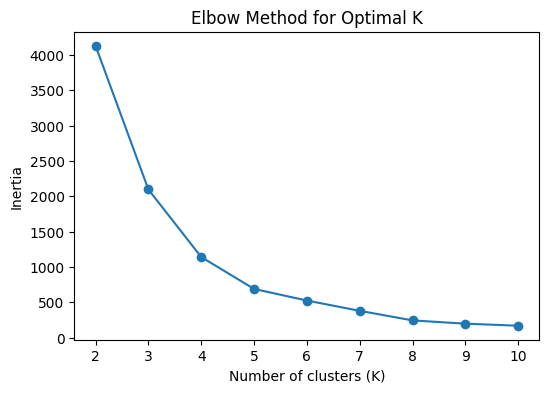

In [12]:
from sklearn.cluster import KMeans


clusters_range = range(2, 11)

inertia_values = []
for k in clusters_range:
    kmeans_i = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans_i.fit(X)
    inertia_values.append(kmeans_i.inertia_)


plt.figure(figsize=(6, 4))
plt.plot(clusters_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Lựa chọn chỉ các cột huy chương
X = df_2024[['Gold', 'Silver', 'Bronze']]

# Áp dụng KMeans (giả sử bạn muốn 3 cụm, bạn có thể thay đổi số cụm)
kmeans = KMeans(n_clusters=3, random_state=0)
df_2024['Cluster_2024'] = kmeans.fit_predict(X)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17036\3903764227.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Cluster_2024'] = kmeans.fit_predict(X)


In [14]:
df_2024 = df_2024[['NOC_CODE', 'Gold', 'Silver','Bronze','Cluster_2024']]
df_joined = pd.merge(df_2024, df_combined, left_on='NOC_CODE', right_on='NOC', how='inner')

In [34]:
df_joined.iloc[11]

NOC_CODE             CAN
Gold_x                 9
Silver_x               7
Bronze_x              11
Cluster_2024           1
NOC                  CAN
Gold_y          7.044219
Silver_y        7.224914
Bronze_y        8.158072
Cluster_2028           0
Name: 11, dtype: object

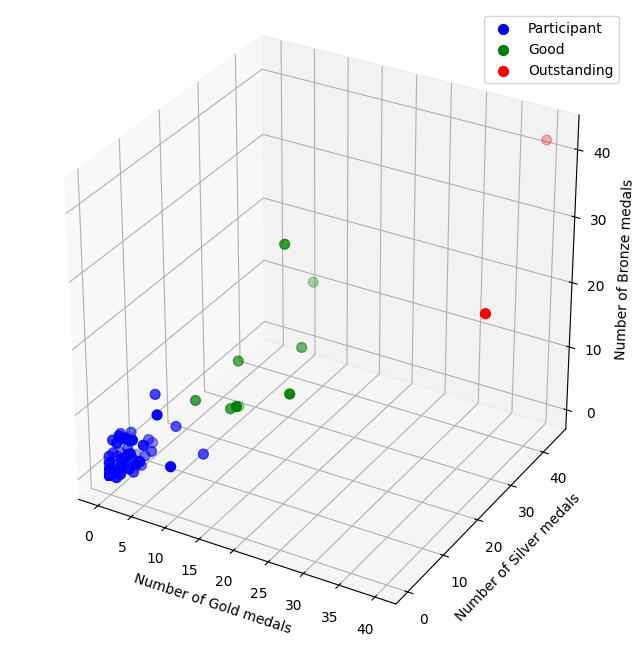

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


X = df_joined[['Gold_x', 'Silver_x', 'Bronze_x']].values
clusters1 = df_joined['Cluster_2024'].values

# Định nghĩa bảng màu
colors = ['blue', 'green', 'red']  # Màu sắc cho từng cụm (giữ cố định)

group_names = ["Participant", "Good", "Outstanding"]
# Vẽ cụm 1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate(colors):
    ax.scatter(X[clusters1 == i, 0], X[clusters1  == i, 1], X[clusters1  == i, 2], 
               c=color, label=group_names[i], s=50)
ax.set_xlabel('Number of Gold medals')
ax.set_ylabel('Number of Silver medals')
ax.set_zlabel('Number of Bronze medals')
ax.set_box_aspect([1, 1, 1])
plt.legend()
plt.show()




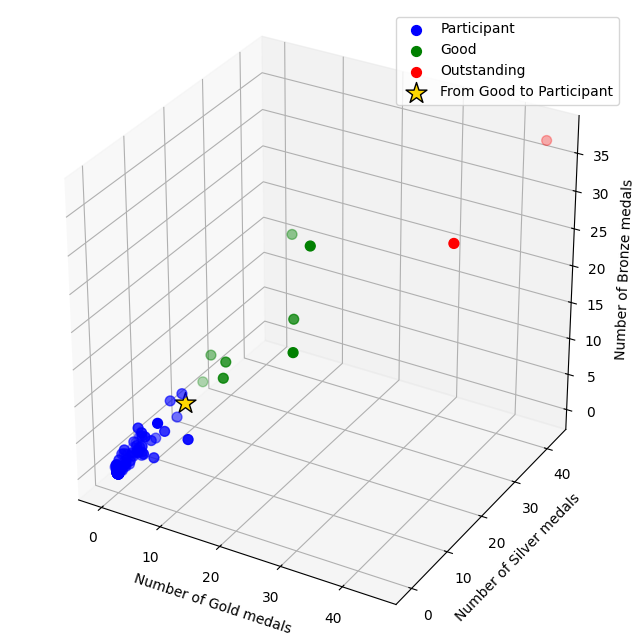

In [31]:
# Vẽ cụm 2 (giữ màu của cụm 1)
X = df_joined[['Gold_y', 'Silver_y', 'Bronze_y']].values
clusters2 = df_joined['Cluster_2028'].values

# Định nghĩa bảng màu
colors = ['blue', 'green', 'red']  # Màu sắc cho từng cụm (giữ cố định)


# Vẽ cụm 2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate(colors):
    # Điểm giữ nguyên (cụm giống nhau)
    same_cluster = (clusters1 == i) & (clusters2 == i)
    ax.scatter(
        X[same_cluster, 0], X[same_cluster, 1], X[same_cluster, 2],
        c=color, label=group_names[i], s=50
    )

# Điểm khác cụm
different_cluster = clusters1 != clusters2
ax.scatter(
    X[different_cluster, 0], X[different_cluster, 1], X[different_cluster, 2], s=250,
        edgecolor='black',
        linewidth=1,
        marker='*',
        zorder=10,
        color='gold', 
        label='From Good to Participant'
)

ax.set_xlabel('Number of Gold medals')
ax.set_ylabel('Number of Silver medals')
ax.set_zlabel('Number of Bronze medals')
ax.set_box_aspect([1, 1, 1])

plt.legend()
plt.show()



In [18]:
print(different_cluster)

[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa